# About this notebook
We use this notebook as a playground, such as creating images for our presentation / readme and testing.
Figures are saved in the `img` folder.

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

from src.data_extraction import DataExtractor

## Creating images that shows the cropping process
We use the generated figures to show the process of cropping, in e.g. our PPT or in our Read Me.

In [4]:
de = DataExtractor(top_dir_path="../data/raw")

# Load data & lines_data from json files
df_data, df_lines = de.from_json(attr="all", file_name=["data.json", "lines_data_cw.json"], from_dir="../data/extracted")

In [77]:
df_lines.head(5)

,img_id,img_path,line_img_path,font,theme,language,repository,file,line_number,x,y,height,width,character_width,code_width,text
line1,img1,../data/raw/CoffeeScript/abe33~atom-color-high...,../data/raw/CoffeeScript/abe33~atom-color-high...,Andale Mono,Learn with Sumit Theme,CoffeeScript,abe33~atom-color-highlight,lib~atom-color-highlight-element.coffee,1.0,426,57,22.0,915.0,10.068966,292.0,_ = require 'underscore-plus'
line2,img1,../data/raw/CoffeeScript/abe33~atom-color-high...,../data/raw/CoffeeScript/abe33~atom-color-high...,Andale Mono,Learn with Sumit Theme,CoffeeScript,abe33~atom-color-highlight,lib~atom-color-highlight-element.coffee,2.0,426,79,22.0,915.0,10.072727,554.0,"{CompositeDisposable, Disposable} = require 'e..."
line3,img1,../data/raw/CoffeeScript/abe33~atom-color-high...,None,Andale Mono,Learn with Sumit Theme,CoffeeScript,abe33~atom-color-highlight,lib~atom-color-highlight-element.coffee,3.0,426,101,NaN,NaN,NaN,NaN,None
line4,img1,../data/raw/CoffeeScript/abe33~atom-color-high...,../data/raw/CoffeeScript/abe33~atom-color-high...,Andale Mono,Learn with Sumit Theme,CoffeeScript,abe33~atom-color-highlight,lib~atom-color-highlight-element.coffee,4.0,426,123,22.0,915.0,10.071429,423.0,MarkerElement = require './marker-element'
line5,img1,../data/raw/CoffeeScript/abe33~atom-color-high...,../data/raw/CoffeeScript/abe33~atom-color-high...,Andale Mono,Learn with Sumit Theme,CoffeeScript,abe33~atom-color-highlight,lib~atom-color-highlight-element.coffee,5.0,426,145,22.0,915.0,10.081633,494.0,DotMarkerElement = require './dot-marker-element'


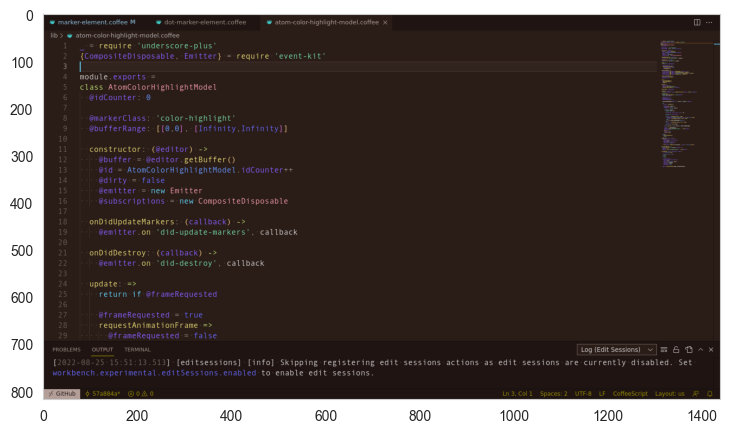

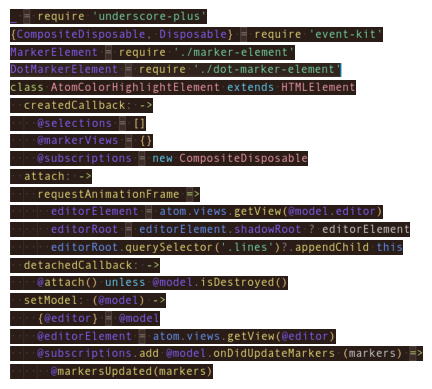

In [80]:
def plot_img_sample(img_path: str, savefig:bool = True):
    """
    Function to plot code grid image given img_path as parameter
    :param img_path Path to the image to be plotted
    """

    # Get image from image path
    img = cv2.imread(img_path)
    plt.figure(figsize=(10,5))
    #plt.title(img_path)
    plt.grid(None)
    plt.imshow(img)
    if savefig:
        plt.savefig("../img/sample.png", dpi=128)

def plot_lines(img_path: str, savefig:bool = True):
    """
    Function to plot all lines of a given image vertically using subplots.
    :param img_path Path to the image where its lines should be plotted
    """

    # Select from df_lines only relevant data
    img_path = img_path
    lines_list = list(df_lines[df_lines.img_path == img_path].line_img_path)
    # Remove Nones
    lines_list = [x for x in lines_list if x is not None]

    # Plot settings
    fig, axes = plt.subplots(nrows=len(lines_list), ncols=1)
    for i, line_img in enumerate(lines_list):
        img = cv2.imread(line_img)
        axes[i].imshow(img)
        axes[i].grid(None)
        axes[i].axis("off")
        axes[i].set_anchor('W')
    if savefig:
        plt.savefig("../img/sample_lines.png", dpi=128)
    plt.show()


# Define here custom image to be plotted
IMG_PATH = "../data/raw/CoffeeScript/abe33~atom-color-highlight/lib~atom-color-highlight-element.coffee/img.png"
IMG_PATH_2 = "../data/raw/CoffeeScript/abe33~atom-color-highlight/lib~atom-color-highlight-model.coffee/img.png"
# Call functions
plot_img_sample(IMG_PATH_2)
plot_lines(IMG_PATH)

______________________________

## Create images that shows the prediction on test set

In [3]:
# Read data
test_df_with_metrices = pd.read_json("../data/predictions/test_df_evaluated_all_w_metrices.json")
test_df_with_metrices.head(5)

,line_img_path,labels,predictions,cer,edit_distance
0,../data/raw/Kotlin/horizontalsystems~unstoppab...,private val feeChangeHeight: Long = if (te...,private val freeChangeHeight: Long = if (t...,0.135593,0.92562
1,../data/raw/CoffeeScript/EtienneLem~skeleton/e...,if stats.isDirectory(),if stats.isDirectory(),0.000000,1.00000
2,../data/raw/CoffeeScript/EtienneLem~skeleton/e...,# Go through the loop again if it is a dir...,# Go through the loop again if it is a dir...,0.000000,1.00000
3,../data/raw/CoffeeScript/EtienneLem~skeleton/e...,stats = fs.lstatSync(path),stats = fs.lstatSync(path),0.000000,1.00000
4,../data/raw/CoffeeScript/EtienneLem~skeleton/e...,"path = ""#{dir}/#{file}""","path = ""#{dir}/#{file}""",0.000000,1.00000


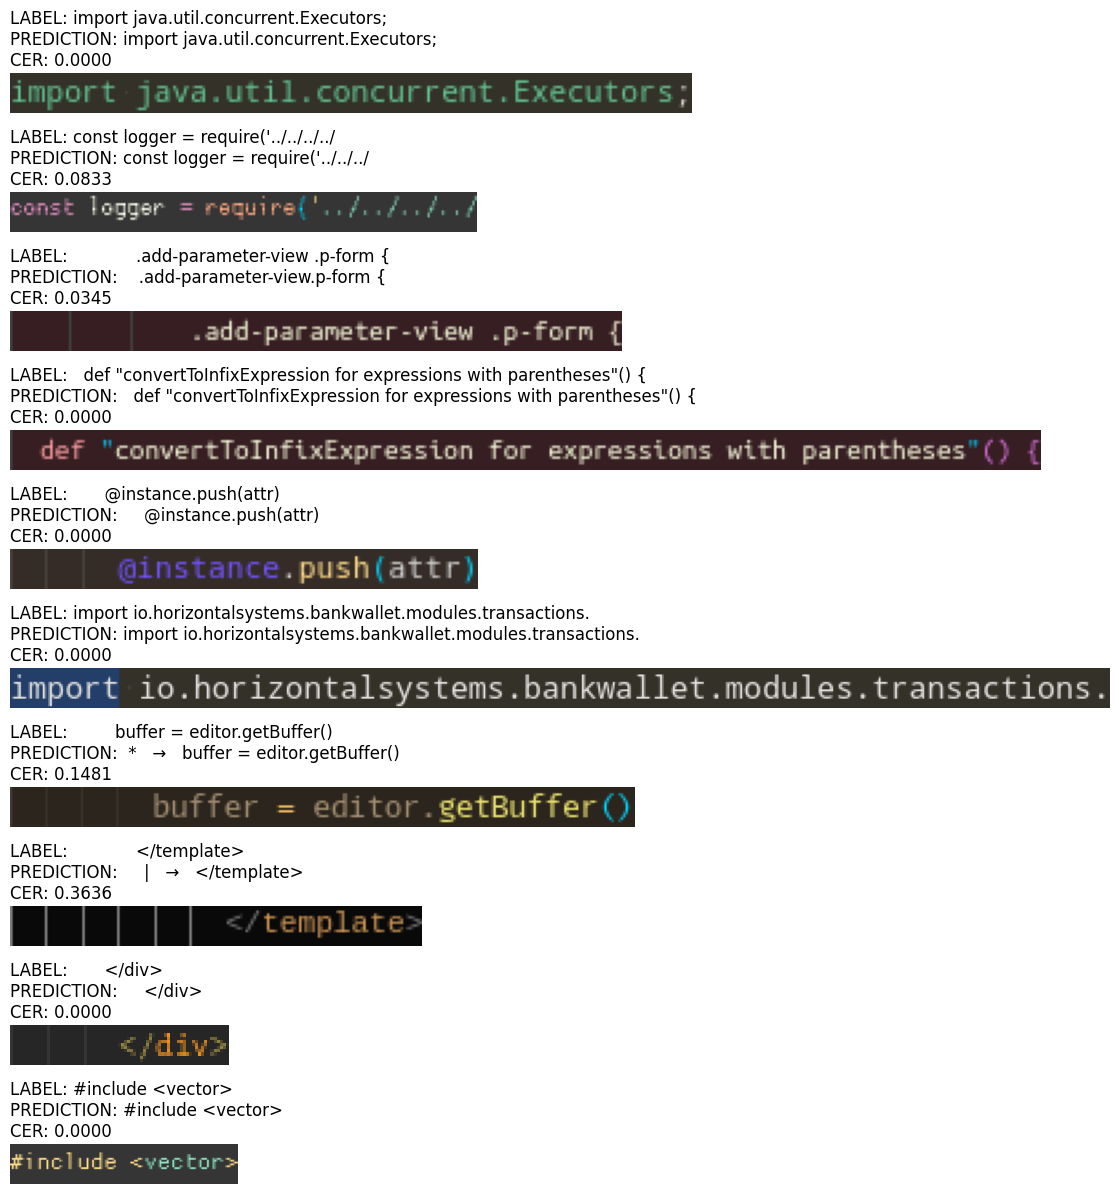

In [127]:
def plot_prediction_samples(df, n_rows = 4, n_cols = 1, n_samples = 10, savefig=True):
    # Take sample
    df = df.sample(n_samples)
    df = df.reset_index()
    
    # Plot settings
    fig, axes = plt.subplots(nrows=len(df), ncols=n_cols, figsize=(15, 12))
    #fig.suptitle(f"Sample of models predictions (n = {n_samples}) " + 
    #             f"| CER $\mu$ = {np.mean(df.cer):.4f} | CER $\sigma$ = {np.std(df.cer):.4f} \n",
    #             horizontalalignment='right',
    #             fontweight="bold")
    for i, row in df.iterrows():
        img = cv2.imread(row.line_img_path)
        axes[i].set_title(f"LABEL: {row.labels}\nPREDICTION: {row.predictions}\nCER: {row.cer:.4f}",
                          loc="left")
        axes[i].imshow(img)
        axes[i].grid(None)
        axes[i].axis("off")
        axes[i].set_anchor('W')
    if savefig:
        plt.savefig("../img/sample_predictions.png", dpi=128)
    plt.tight_layout()
    plt.show()
    
plot_prediction_samples(df=test_df_with_metrices)